In [77]:
import numpy as np
import matplotlib.pyplot as plt

#Define constants
n_a = 1
n_w = 1.334
N = 100   #Number of datapoints
theta_i = np.linspace(0, np.pi/2 ,N)


In [101]:
def TE_reflection_coeff (n_i, n_t, theta_i, theta_t):
    return ((n_i*np.cos(theta_i) - n_t*np.cos(theta_t))/(n_i*np.cos(theta_i) + n_t*np.cos(theta_t)))**2

def TM_reflection_coeff (n_i, n_t, theta_i, theta_t):
    return ((n_t*np.cos(theta_i) - n_i*np.cos(theta_t))/(n_i*np.cos(theta_t) + n_t*np.cos(theta_i)))**2

def TE_transmission_coeff (n_i, n_t, theta_i, theta_t ):
    return 1-TE_reflection_coeff (n_i, n_t, theta_i, theta_t) #Energy must be preserved so 1-reflected must be transmitted amplitude

def TM_transmission_coeff (n_i, n_t, theta_i, theta_t ):
    return 1-TM_reflection_coeff (n_i, n_t, theta_i, theta_t)

In [102]:
#Calculations for external reflection

n_i = n_a
n_t = n_w
theta_t = np.arcsin(n_i/n_t * np.sin(theta_i)) #calculate with snells law

External_R_TE = TE_reflection_coeff(n_i, n_t, theta_i, theta_t)
External_R_TM = TM_reflection_coeff(n_i, n_t, theta_i, theta_t)

External_T_TE = TE_transmission_coeff(n_i, n_t, theta_i, theta_t)
External_T_TM = TM_transmission_coeff(n_i, n_t, theta_i, theta_t)

In [106]:
#Calculations for internal reflection

n_i = n_w
n_t = n_a
theta_t = np.arcsin(n_i/n_t * np.sin(theta_i)) #calculate with snells law

Internal_R_TE = TE_reflection_coeff(n_i, n_t, theta_i, theta_t)
Internal_R_TM = TM_reflection_coeff(n_i, n_t, theta_i, theta_t)

Internal_T_TE = TE_transmission_coeff(n_i, n_t, theta_i, theta_t)
Internal_T_TM = TM_transmission_coeff(n_i, n_t, theta_i, theta_t)

<ipython-input-106-a2e5f0a1ac4c>:5: RuntimeWarning: invalid value encountered in arcsin
  theta_t = np.arcsin(n_i/n_t * np.sin(theta_i)) #calculate with snells law


In [135]:
#Calculate Brewster angles

brewster_Ext = np.arctan(n_w/n_a)
brewster_Int =np.arctan(n_a/n_w)
print (brewster_Int)

0.6432611855733198


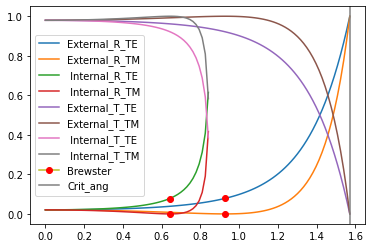

In [146]:
fig = plt.figure()
plt.plot(theta_i, External_R_TE, label ="External_R_TE")
plt.plot(theta_i, External_R_TM, label ="External_R_TM")
plt.plot(theta_i, Internal_R_TE, label =" Internal_R_TE")
plt.plot(theta_i, Internal_R_TM, label =" Internal_R_TM")

plt.plot(theta_i, External_T_TE, label ="External_T_TE")
plt.plot(theta_i, External_T_TM, label ="External_T_TM")
plt.plot(theta_i, Internal_T_TE, label =" Internal_T_TE")
plt.plot(theta_i, Internal_T_TM, label =" Internal_T_TM")

plt.plot(brewster_Ext, External_R_TE[int(brewster_Ext*100/(np.pi/2))],  marker = "o", markerfacecolor="red", markeredgecolor="red", label = "Brewster")
plt.plot(brewster_Ext, External_R_TM[int(brewster_Ext*100/(np.pi/2))],  marker = "o", markerfacecolor="red", markeredgecolor="red")
plt.plot(brewster_Int, Internal_R_TE[int(brewster_Int*100/(np.pi/2))],  marker = "o", markerfacecolor="red", markeredgecolor="red")
plt.plot(brewster_Int, Internal_R_TM[int(brewster_Int*100/(np.pi/2))],  marker = "o", markerfacecolor="red", markeredgecolor="red")

plt.axvline(np.pi/2, color = "gray", label = "Crit_ang")

plt.legend()